In [1]:
import pandas as pd
import seaborn as sns
# import ggplot as gg
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
env_shift = pd.read_csv('ext_env_shift_results.csv')
print(len(env_shift))
env_shift.sort_values(['network_size', 'network', 'simulation', 'it'], inplace=True)

top_shift = pd.read_csv('ext_top_shift_results.csv')
print(len(top_shift))
top_shift.sort_values(['network_size', 'network', 'simulation', 'it'], inplace=True)

120300
80200


In [3]:
env_shift[:5]

,it,GG_mean,DG_mean,DG_CL_mean,CL_mean,GG_avar,DG_avar,DG_CL_avar,CL_avar,network,simulation,network_size
28471,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,clique,0,8
28472,50,0.014912,0.348134,0.316383,0.016996,0.000777,0.014829,0.033460,0.001058,clique,0,8
28473,100,0.067400,0.626695,0.400914,0.019747,0.001337,0.006013,0.017672,0.000471,clique,0,8
28474,150,0.117301,0.732188,0.504539,0.052798,0.001357,0.002321,0.016080,0.001234,clique,0,8
28475,200,0.210459,0.785392,0.564021,0.089467,0.002940,0.001218,0.015301,0.001091,clique,0,8


In [4]:
top_shift[:5]

,it,GG_mean,DG_mean,DG_CL_mean,CL_mean,GG_avar,DG_avar,DG_CL_avar,CL_avar,network,simulation,network_size
19248,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,clique,0,8
19249,50,0.038675,0.373611,0.335417,0.021429,0.003541,0.020280,0.038762,0.001633,clique,0,8
19250,100,0.090806,0.621031,0.523539,0.042551,0.001191,0.002329,0.015470,0.001001,clique,0,8
19251,150,0.108802,0.737434,0.641523,0.108659,0.001492,0.001543,0.010425,0.002335,clique,0,8
19252,200,0.144085,0.787210,0.698538,0.171233,0.001295,0.001403,0.011925,0.002367,clique,0,8


In [5]:
def plot_sizes(data, value, valstat="mean"):
    sizes = sorted(data.network_size.unique())
    n = len(sizes)
    fig, axs = plt.subplots(n, 1, figsize=(12, 6 * n), sharex=True, sharey=True)
    for i, size in enumerate(sizes):
        ax = sns.tsplot(
            data=data[data.network_size == size],
            value=value + "_" + valstat, time='it', unit='simulation', condition='network',
            ax=axs[i], n_boot=100
        )
        ax.set_ylim(0.0, 1.0)
        ax.set_title('N = %d' % size)

  * GG -- to jest communicative success dla pierwszej topologii/środowiska, na której uczymy najpierw.
  * DG -- to jest discriminative success dla pierwszej topologii/środowiska.
  * CL -- to jest communicative success dla drugiej topologii/środowiska.
  * DG_CL -- to jest discriminative success dla drugiej topologii/środowiska.

## Environment shift

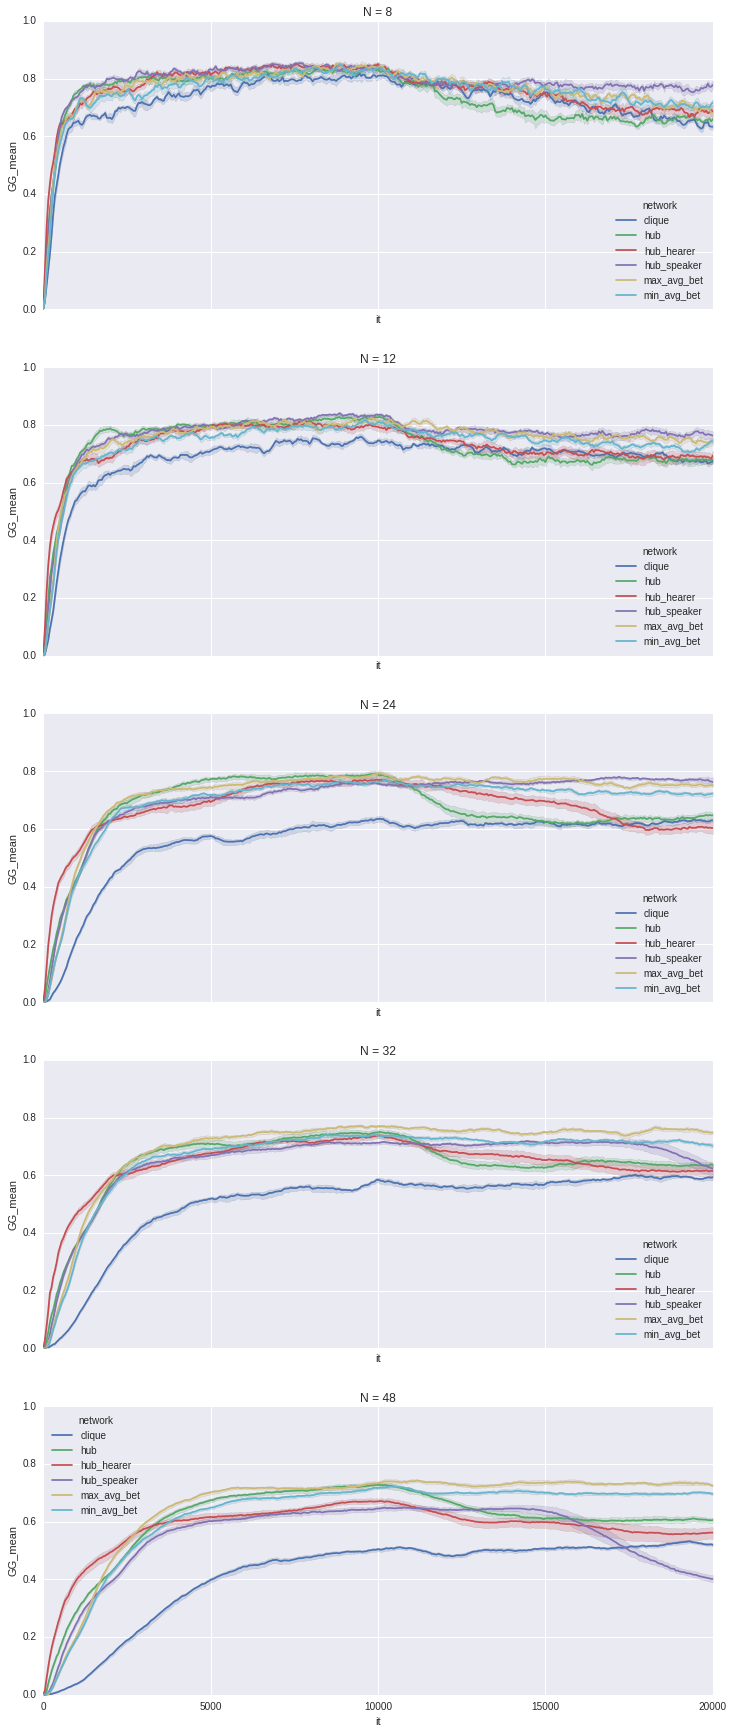

In [6]:
plot_sizes(env_shift, "GG")

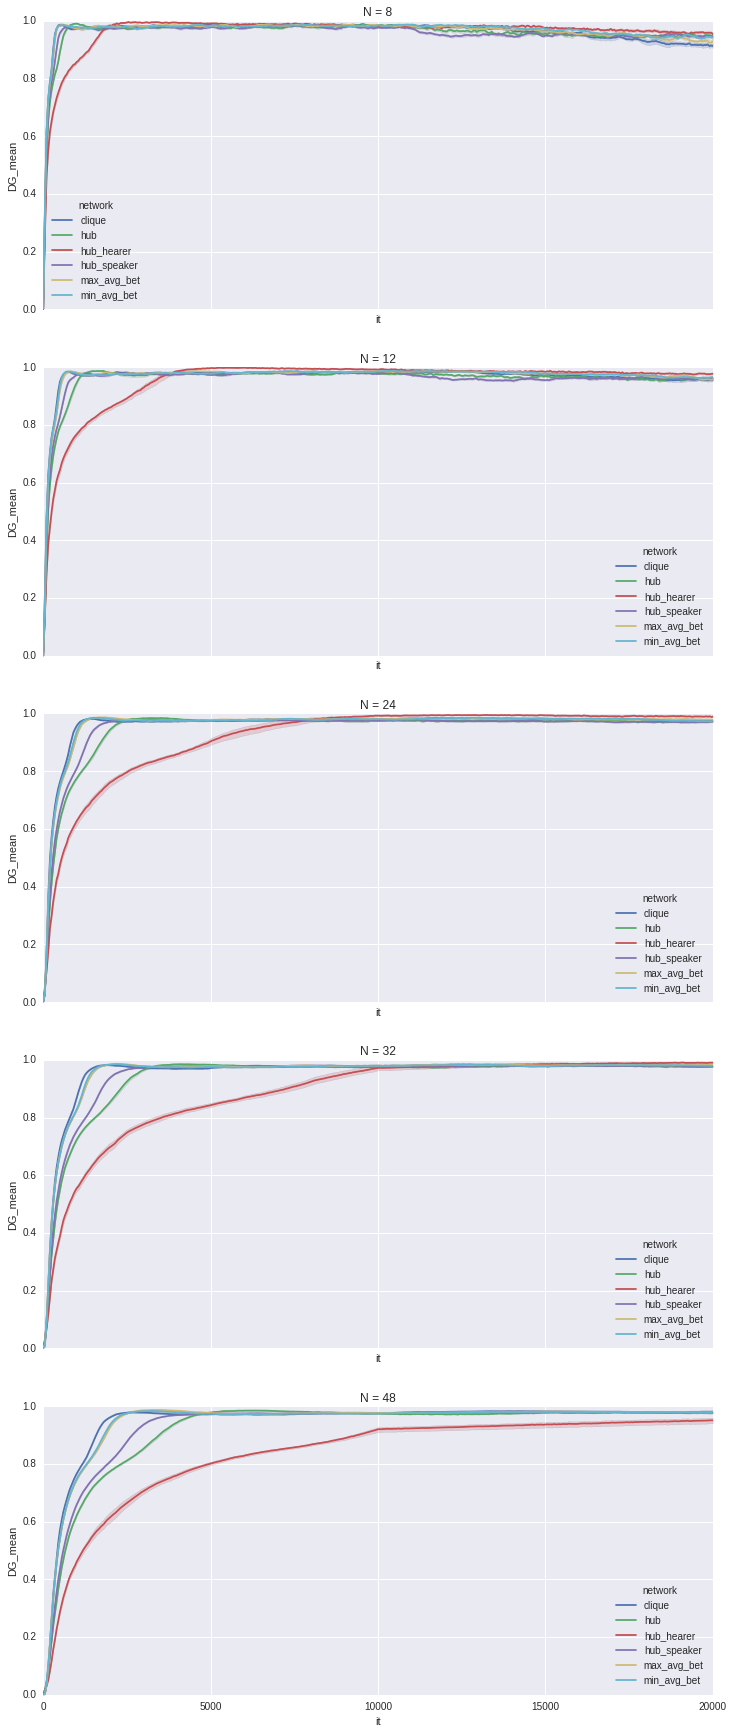

In [7]:
plot_sizes(env_shift, "DG")

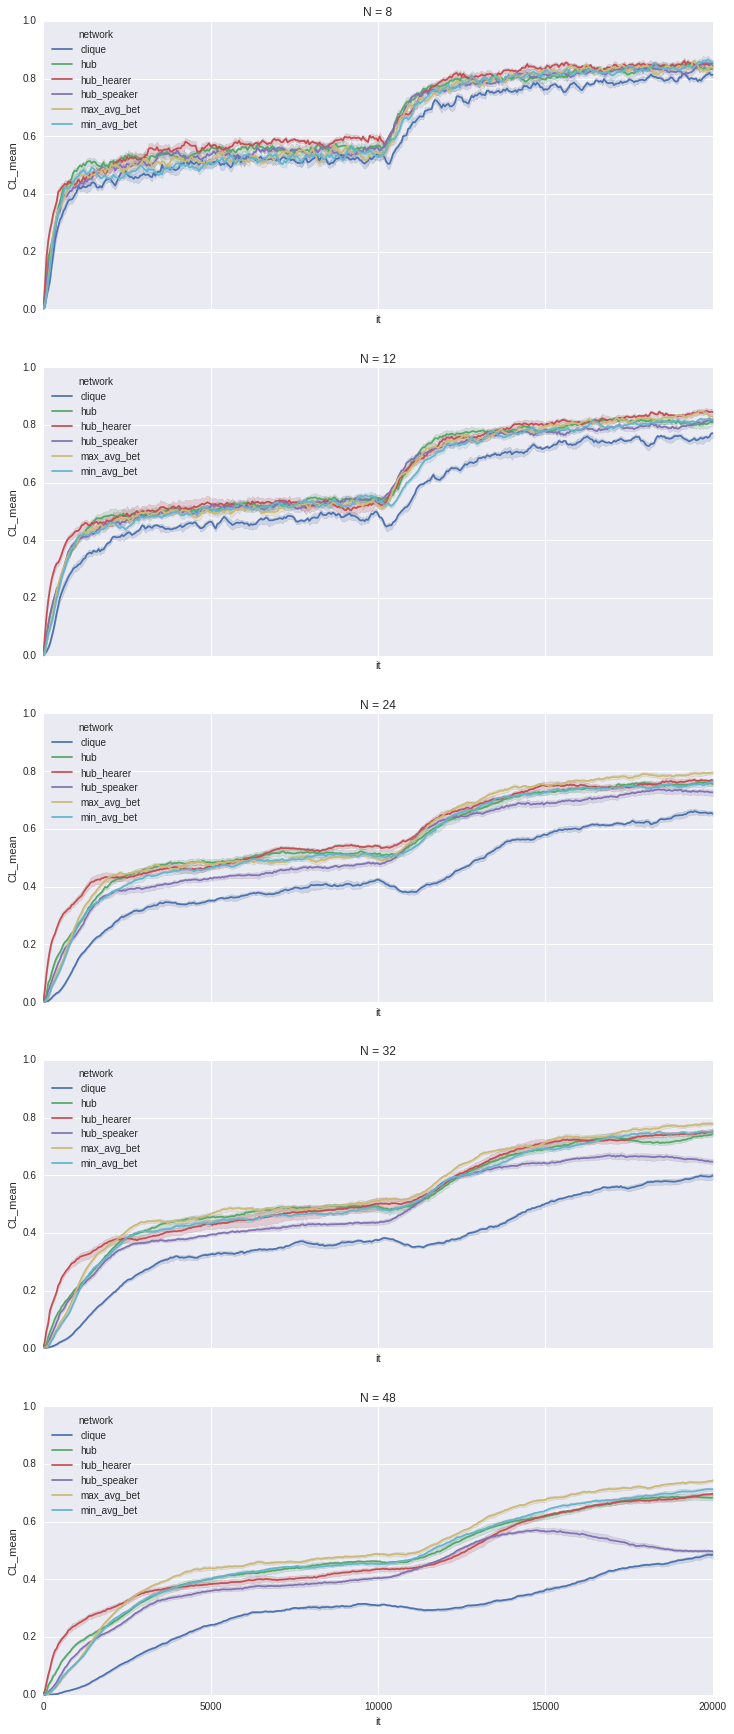

In [8]:
plot_sizes(env_shift, "CL")

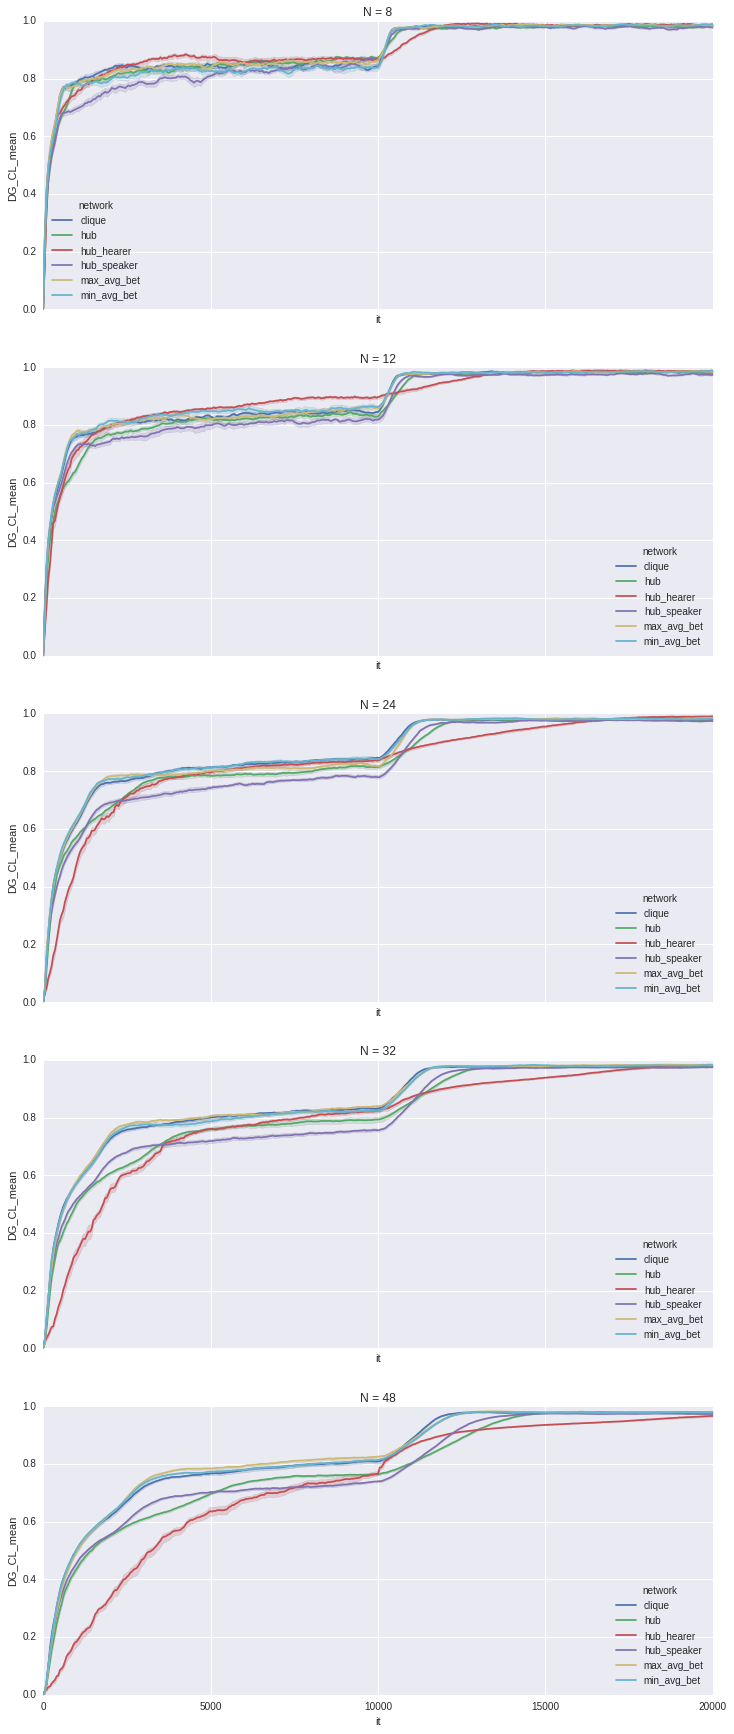

In [9]:
plot_sizes(env_shift, "DG_CL")

## Topology shift

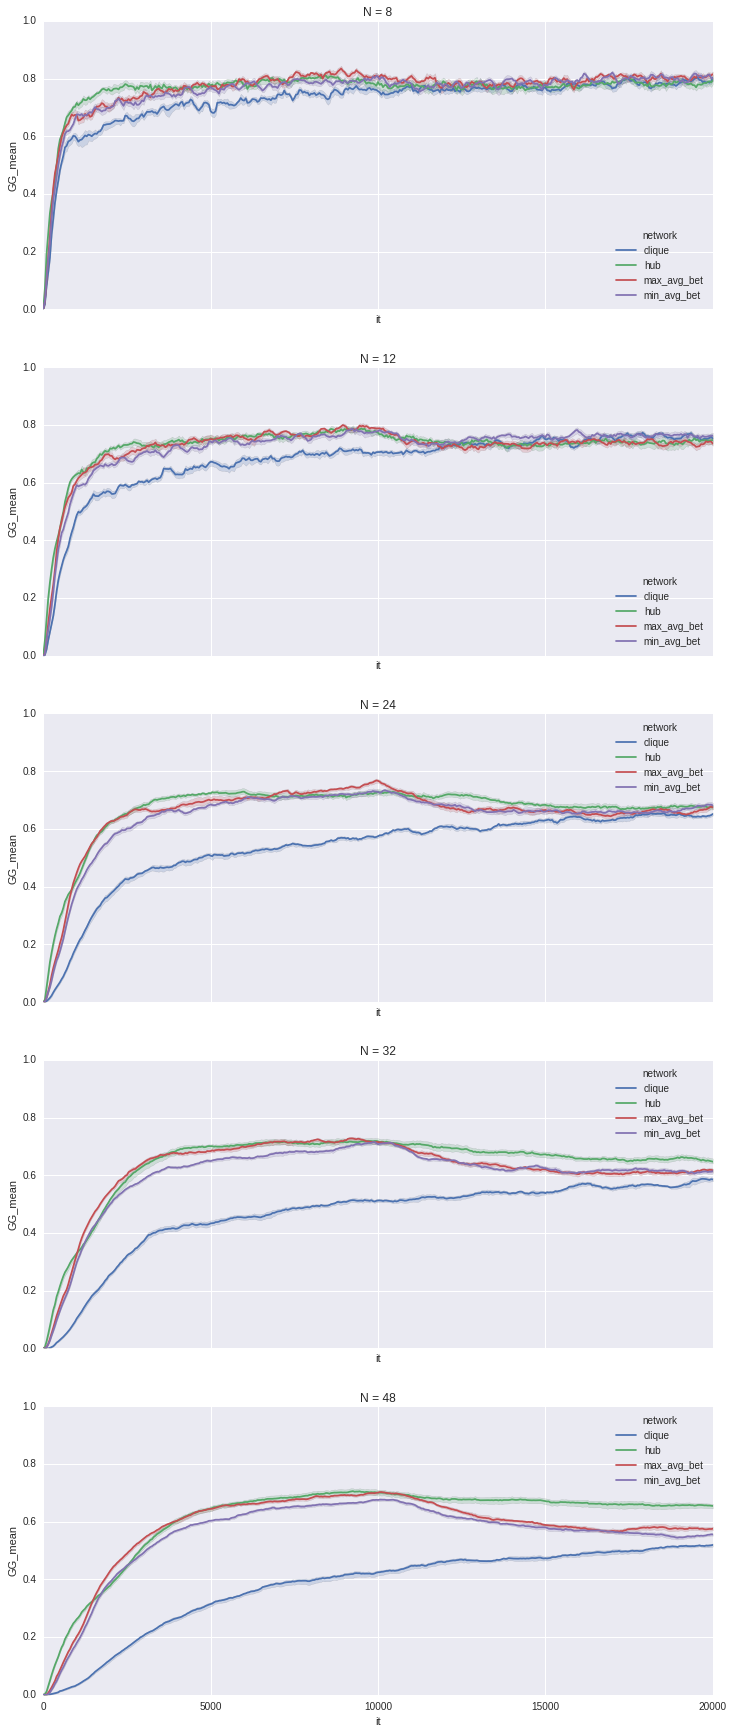

In [10]:
plot_sizes(top_shift, "GG")

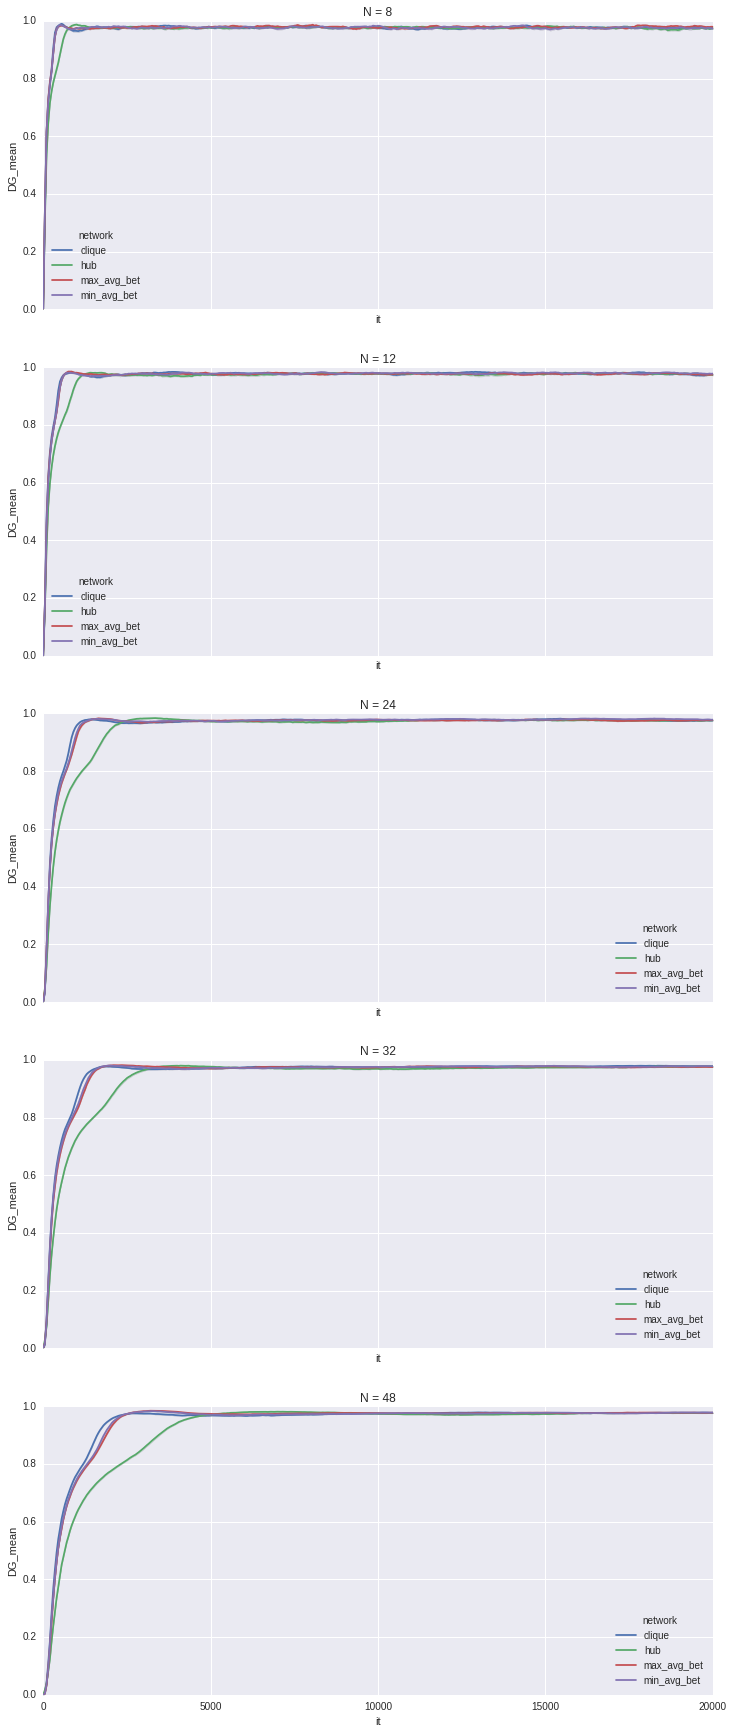

In [11]:
plot_sizes(top_shift, "DG")

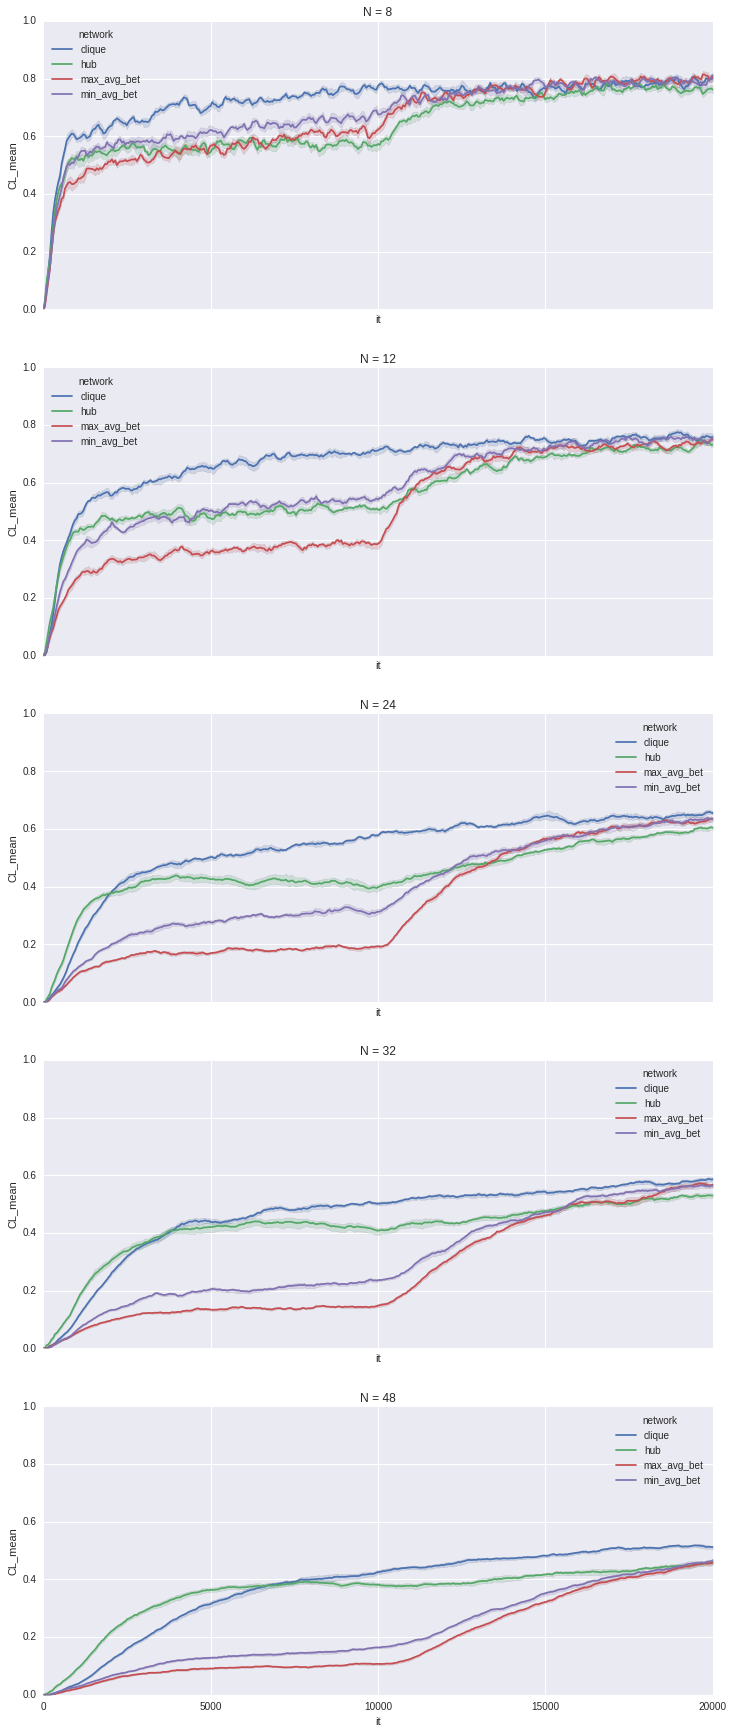

In [12]:
plot_sizes(top_shift, "CL")

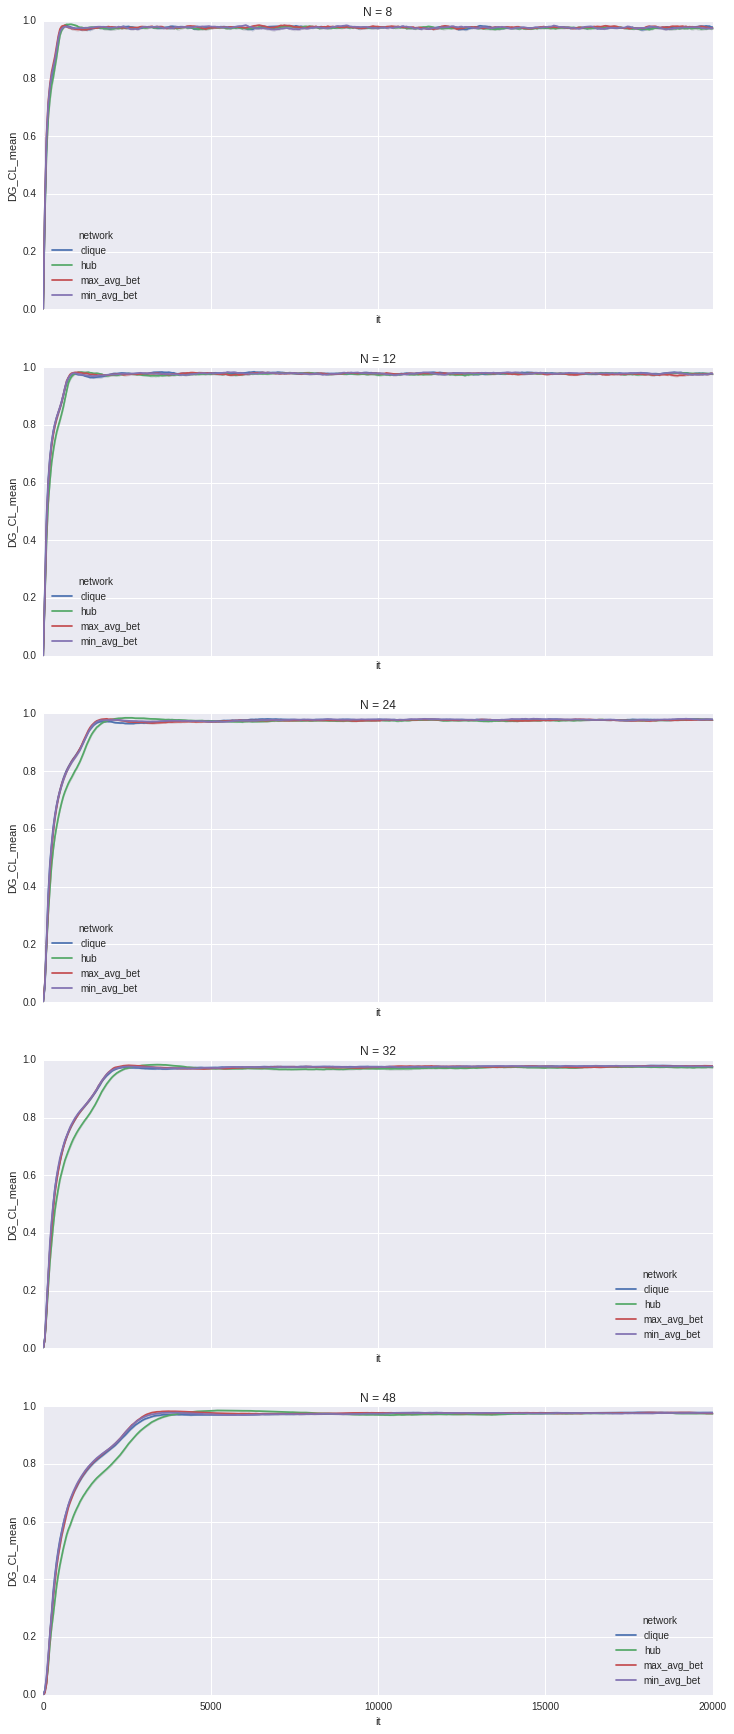

In [13]:
plot_sizes(top_shift, "DG_CL")